# タイタニックの分析
## ライブラリのインポート

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 訓練データの読み込み

In [156]:
df_train = pd.read_csv("train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 敬称を特徴量化

In [159]:
df_train["Name"] = df_train["Name"].map(lambda x:x.split(",")[1].split(".")[0])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,Miss,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,Mr,male,26.0,0,0,111369,30.0000,C148,C


## 欠損とデータ型の確認

In [162]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 使用しない変数の削除
Ticketはどう特徴量にすべきかわからなく、Cabinは欠損が多すぎるため。

In [165]:
df_train = df_train.drop(["Cabin", "Ticket"], axis=1)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Mr,male,22.0,1,0,7.2500,S
1,2,1,1,Mrs,female,38.0,1,0,71.2833,C
2,3,1,3,Miss,female,26.0,0,0,7.9250,S
3,4,1,1,Mrs,female,35.0,1,0,53.1000,S
4,5,0,3,Mr,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,27.0,0,0,13.0000,S
887,888,1,1,Miss,female,19.0,0,0,30.0000,S
888,889,0,3,Miss,female,NaN,1,2,23.4500,S
889,890,1,1,Mr,male,26.0,0,0,30.0000,C


## Embarkedを埋める
欠損の数が少ないため代表値として最頻値を使う

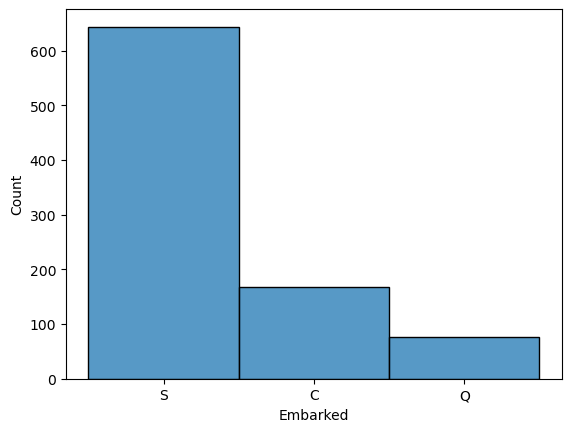

In [168]:
sns.histplot(df_train["Embarked"])
plt.show()

In [170]:
df_train["Embarked"] = df_train["Embarked"].fillna("S")

## 欠損を確認

In [173]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

## Ageの欠損を埋める
Ageは欠損の数が多いため機械学習を使う
### ダミー変数化

In [176]:
df_train = pd.get_dummies(df_train)
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name_ Capt,Name_ Col,Name_ Don,...,Name_ Mrs,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,True,False,False,False,False,True,False,True,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,True,False,False,False,False,True,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,False,False,False,...,False,False,True,False,False,False,True,False,False,True
887,888,1,1,19.0,0,0,30.0000,False,False,False,...,False,False,False,False,False,True,False,False,False,True
888,889,0,3,NaN,1,2,23.4500,False,False,False,...,False,False,False,False,False,True,False,False,False,True
889,890,1,1,26.0,0,0,30.0000,False,False,False,...,False,False,False,False,False,False,True,True,False,False


### インデックスを指定して削除

In [179]:
df_train.index = df_train["PassengerId"]
df_train = df_train.drop("PassengerId", axis=1)
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Name_ Capt,Name_ Col,Name_ Don,Name_ Dr,...,Name_ Mrs,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,1,1,38.0,1,0,71.2833,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
3,1,3,26.0,0,0,7.9250,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,1,1,35.0,1,0,53.1000,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
5,0,3,35.0,0,0,8.0500,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,False,False,False,False,...,False,False,True,False,False,False,True,False,False,True
888,1,1,19.0,0,0,30.0000,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
889,0,3,NaN,1,2,23.4500,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


### 機械学習でAgeを埋める

In [182]:
x_train = df_train.dropna().drop("Age", axis=1)
x_test = df_train[df_train["Age"].isnull()].drop("Age", axis=1)
y_train = df_train.dropna()["Age"]

In [184]:
from sklearn.ensemble import GradientBoostingRegressor

In [186]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [188]:
pred = pd.DataFrame(y_pred)
pred.columns = ["Age"]
pred.index = x_test.index
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, pred], axis=1)
df_train = pd.concat([train, test])
df_train

,Survived,Pclass,SibSp,Parch,Fare,Name_ Capt,Name_ Col,Name_ Don,Name_ Dr,Name_ Jonkheer,...,Name_ Ms,Name_ Rev,Name_ Sir,Name_ the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,0,7.2500,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,22.000000
2,1,1,1,0,71.2833,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,38.000000
3,1,3,0,0,7.9250,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,26.000000
4,1,1,1,0,53.1000,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,35.000000
5,0,3,0,0,8.0500,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,0,0,7.2292,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,28.505368
864,0,3,8,2,69.5500,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,5.778525
869,0,3,0,0,9.5000,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,28.802969


In [190]:
df_train.isnull().sum()

Survived              0
Pclass                0
SibSp                 0
Parch                 0
Fare                  0
Name_ Capt            0
Name_ Col             0
Name_ Don             0
Name_ Dr              0
Name_ Jonkheer        0
Name_ Lady            0
Name_ Major           0
Name_ Master          0
Name_ Miss            0
Name_ Mlle            0
Name_ Mme             0
Name_ Mr              0
Name_ Mrs             0
Name_ Ms              0
Name_ Rev             0
Name_ Sir             0
Name_ the Countess    0
Sex_female            0
Sex_male              0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Age                   0
dtype: int64

欠損がなくなった
## テストデータの読み込み

In [193]:
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## インデックスの指定と削除

In [196]:
df_test.index = df_test["PassengerId"]
df_test = df_test.drop(["PassengerId", "Ticket", "Cabin"], axis=1)

## 敬称を特徴量化

In [199]:
df_test["Name"] = df_test["Name"].map(lambda x:x.split(",")[1].split(".")[0])
df_test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,3,Mr,male,34.5,0,0,7.8292,Q
893,3,Mrs,female,47.0,1,0,7.0000,S
894,2,Mr,male,62.0,0,0,9.6875,Q
895,3,Mr,male,27.0,0,0,8.6625,S
896,3,Mrs,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
1305,3,Mr,male,NaN,0,0,8.0500,S
1306,1,Dona,female,39.0,0,0,108.9000,C
1307,3,Mr,male,38.5,0,0,7.2500,S


## 欠損とデータの型を確認

In [202]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


## Fareの欠損を埋める
400くらいのデータ数なのでbinsを40でヒストグラムを作成する。

(array([175.,  90.,  58.,  15.,  21.,  14.,  10.,   3.,   2.,   0.,   6.,
          3.,   2.,   0.,   0.,   0.,   5.,   4.,   0.,   1.,   7.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  12.80823,  25.61646,  38.42469,  51.23292,  64.04115,
         76.84938,  89.65761, 102.46584, 115.27407, 128.0823 , 140.89053,
        153.69876, 166.50699, 179.31522, 192.12345, 204.93168, 217.73991,
        230.54814, 243.35637, 256.1646 , 268.97283, 281.78106, 294.58929,
        307.39752, 320.20575, 333.01398, 345.82221, 358.63044, 371.43867,
        384.2469 , 397.05513, 409.86336, 422.67159, 435.47982, 448.28805,
        461.09628, 473.90451, 486.71274, 499.52097, 512.3292 ]),
 <BarContainer object of 40 artists>)

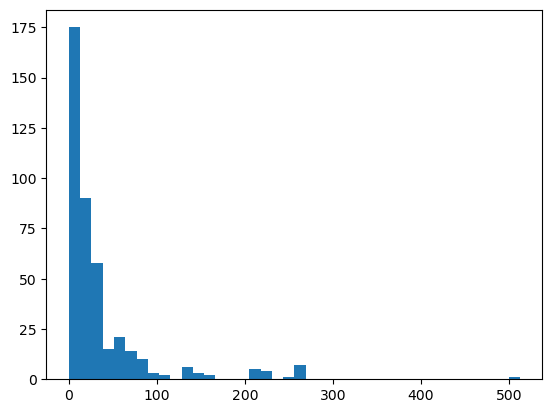

In [205]:
plt.hist(df_test["Fare"], bins=40)

外れ値が大きいため中央値で補完する。

In [208]:
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].median())

## Ageの欠損を埋める

In [211]:
df_test = pd.get_dummies(df_test)
df_test

,Pclass,Age,SibSp,Parch,Fare,Name_ Col,Name_ Dona,Name_ Dr,Name_ Master,Name_ Miss,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,34.5,0,0,7.8292,False,False,False,False,False,True,False,False,False,False,True,False,True,False
893,3,47.0,1,0,7.0000,False,False,False,False,False,False,True,False,False,True,False,False,False,True
894,2,62.0,0,0,9.6875,False,False,False,False,False,True,False,False,False,False,True,False,True,False
895,3,27.0,0,0,8.6625,False,False,False,False,False,True,False,False,False,False,True,False,False,True
896,3,22.0,1,1,12.2875,False,False,False,False,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,NaN,0,0,8.0500,False,False,False,False,False,True,False,False,False,False,True,False,False,True
1306,1,39.0,0,0,108.9000,False,True,False,False,False,False,False,False,False,True,False,True,False,False
1307,3,38.5,0,0,7.2500,False,False,False,False,False,True,False,False,False,False,True,False,False,True


### 機械学習で埋める

In [214]:
x_train = df_test.dropna().drop("Age", axis=1)
x_test = df_test[df_test["Age"].isnull()].drop("Age", axis=1)
y_train = df_test.dropna()["Age"]

In [216]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [218]:
pred = pd.DataFrame(y_pred)
pred.index = x_test.index
pred.columns = ["Age"]
test = pd.concat([x_test, pred], axis=1)
train = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([train, test])
df_test

,Pclass,SibSp,Parch,Fare,Name_ Col,Name_ Dona,Name_ Dr,Name_ Master,Name_ Miss,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,0,0,7.8292,False,False,False,False,False,True,False,False,False,False,True,False,True,False,34.500000
893,3,1,0,7.0000,False,False,False,False,False,False,True,False,False,True,False,False,False,True,47.000000
894,2,0,0,9.6875,False,False,False,False,False,True,False,False,False,False,True,False,True,False,62.000000
895,3,0,0,8.6625,False,False,False,False,False,True,False,False,False,False,True,False,False,True,27.000000
896,3,1,1,12.2875,False,False,False,False,False,False,True,False,False,True,False,False,False,True,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3,0,0,7.7208,False,False,False,False,True,False,False,False,False,True,False,False,True,False,24.098642
1302,3,0,0,7.7500,False,False,False,False,True,False,False,False,False,True,False,False,True,False,24.351380
1305,3,0,0,8.0500,False,False,False,False,False,True,False,False,False,False,True,False,False,True,26.174385


# カラムの確認
敬称の数が合っているか確認

In [241]:
df_train.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Name_ Capt',
       'Name_ Col', 'Name_ Don', 'Name_ Dr', 'Name_ Jonkheer', 'Name_ Lady',
       'Name_ Major', 'Name_ Master', 'Name_ Miss', 'Name_ Mlle', 'Name_ Mme',
       'Name_ Mr', 'Name_ Mrs', 'Name_ Ms', 'Name_ Rev', 'Name_ Sir',
       'Name_ the Countess', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Age'],
      dtype='object')

In [243]:
df_test.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Name_ Col', 'Name_ Dr',
       'Name_ Master', 'Name_ Miss', 'Name_ Mr', 'Name_ Mrs', 'Name_ Ms',
       'Name_ Rev', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Age'],
      dtype='object')

敬称の数が合っていないため合わせる。
# 存在しない敬称を確認

In [226]:
for col in df_train.columns:
    if col not in df_test.columns:
        print("'"+ col +"',")

'Survived',
'Name_ Capt',
'Name_ Don',
'Name_ Jonkheer',
'Name_ Lady',
'Name_ Major',
'Name_ Mlle',
'Name_ Mme',
'Name_ Sir',
'Name_ the Countess',


# テストデータで訓練データに無い敬称を削除

In [233]:
df_test = df_test.drop(["Name_ Dona"], axis=1)
df_test

,Pclass,SibSp,Parch,Fare,Name_ Col,Name_ Dr,Name_ Master,Name_ Miss,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age
PassengerId,,,,,,,,,,,,,,,,,,
892,3,0,0,7.8292,False,False,False,False,True,False,False,False,False,True,False,True,False,34.500000
893,3,1,0,7.0000,False,False,False,False,False,True,False,False,True,False,False,False,True,47.000000
894,2,0,0,9.6875,False,False,False,False,True,False,False,False,False,True,False,True,False,62.000000
895,3,0,0,8.6625,False,False,False,False,True,False,False,False,False,True,False,False,True,27.000000
896,3,1,1,12.2875,False,False,False,False,False,True,False,False,True,False,False,False,True,22.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3,0,0,7.7208,False,False,False,True,False,False,False,False,True,False,False,True,False,24.098642
1302,3,0,0,7.7500,False,False,False,True,False,False,False,False,True,False,False,True,False,24.351380
1305,3,0,0,8.0500,False,False,False,False,True,False,False,False,False,True,False,False,True,26.174385


# 訓練データでテストデータに無い敬称を削除

In [236]:
for col in df_test.columns:
    if col not in df_train.columns:
        print("'"+ col +"'")

In [245]:
df_train = df_train.drop(['Name_ Capt',
                            'Name_ Don',
                            'Name_ Jonkheer',
                            'Name_ Lady',
                            'Name_ Major',
                            'Name_ Mlle',
                            'Name_ Mme',
                            'Name_ Sir',
                            'Name_ the Countess'], axis=1)

## 変数の順番がずれているため揃える。

In [248]:
df_train = df_train.sort_index(axis=1)
df_test = df_test.sort_index(axis=1)

In [250]:
df_train.columns

Index(['Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare', 'Name_ Col',
       'Name_ Dr', 'Name_ Master', 'Name_ Miss', 'Name_ Mr', 'Name_ Mrs',
       'Name_ Ms', 'Name_ Rev', 'Parch', 'Pclass', 'Sex_female', 'Sex_male',
       'SibSp', 'Survived'],
      dtype='object')

In [252]:
df_test.columns

Index(['Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare', 'Name_ Col',
       'Name_ Dr', 'Name_ Master', 'Name_ Miss', 'Name_ Mr', 'Name_ Mrs',
       'Name_ Ms', 'Name_ Rev', 'Parch', 'Pclass', 'Sex_female', 'Sex_male',
       'SibSp'],
      dtype='object')

In [259]:
df_train

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Name_ Col,Name_ Dr,Name_ Master,Name_ Miss,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Parch,Pclass,Sex_female,Sex_male,SibSp,Survived
PassengerId,,,,,,,,,,,,,,,,,,,
1,22.000000,False,False,True,7.2500,False,False,False,False,True,False,False,False,0,3,False,True,1,0
2,38.000000,True,False,False,71.2833,False,False,False,False,False,True,False,False,0,1,True,False,1,1
3,26.000000,False,False,True,7.9250,False,False,False,True,False,False,False,False,0,3,True,False,0,1
4,35.000000,False,False,True,53.1000,False,False,False,False,False,True,False,False,0,1,True,False,1,1
5,35.000000,False,False,True,8.0500,False,False,False,False,True,False,False,False,0,3,False,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,28.505368,True,False,False,7.2292,False,False,False,False,True,False,False,False,0,3,False,True,0,0
864,5.778525,False,False,True,69.5500,False,False,False,True,False,False,False,False,2,3,True,False,8,0
869,28.802969,False,False,True,9.5000,False,False,False,False,True,False,False,False,0,3,False,True,0,0


In [261]:
df_test

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Name_ Col,Name_ Dr,Name_ Master,Name_ Miss,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Parch,Pclass,Sex_female,Sex_male,SibSp
PassengerId,,,,,,,,,,,,,,,,,,
892,34.500000,False,True,False,7.8292,False,False,False,False,True,False,False,False,0,3,False,True,0
893,47.000000,False,False,True,7.0000,False,False,False,False,False,True,False,False,0,3,True,False,1
894,62.000000,False,True,False,9.6875,False,False,False,False,True,False,False,False,0,2,False,True,0
895,27.000000,False,False,True,8.6625,False,False,False,False,True,False,False,False,0,3,False,True,0
896,22.000000,False,False,True,12.2875,False,False,False,False,False,True,False,False,1,3,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,24.098642,False,True,False,7.7208,False,False,False,True,False,False,False,False,0,3,True,False,0
1302,24.351380,False,True,False,7.7500,False,False,False,True,False,False,False,False,0,3,True,False,0
1305,26.174385,False,False,True,8.0500,False,False,False,False,True,False,False,False,0,3,False,True,0


# 生存の予測

In [264]:
x = df_train.drop("Survived", axis=1)
y = df_train["Survived"]
x_test = df_test

In [266]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RFC
from lightgbm import LGBMClassifier as LGBMC

In [268]:
models = []
for i in range(200):
    x_train, x_val, y_train, y_val = tts(x, y, random_state=i, test_size=0.2)
    model1 = RFC()
    model1.fit(x_train, y_train)
    models.append([model1, model1.score(x_val, y_val)])
    model2 = LGBMC(verbose=-1)
    model2.fit(x_train, y_train)
    models.append([model2, model2.score(x_val, y_val)])
models = sorted(models, key=lambda x:x[1], reverse=True)

In [270]:
models[0]

[LGBMClassifier(verbose=-1), 0.88268156424581]

In [272]:
models[1]

[LGBMClassifier(verbose=-1), 0.8770949720670391]

In [274]:
models[2]

[LGBMClassifier(verbose=-1), 0.8770949720670391]

In [276]:
models[3]

[LGBMClassifier(verbose=-1), 0.8715083798882681]

In [278]:
models[4]

[LGBMClassifier(verbose=-1), 0.8715083798882681]

In [280]:
from scipy.stats import mode
y_pred1 = models[0][0].predict(x_test)
y_pred2 = models[1][0].predict(x_test)
y_pred3 = models[2][0].predict(x_test)
y_pred = []
for i in range(len(y_pred1)):
    y_pred.append(mode([y_pred1[i], y_pred2[i], y_pred3[i]])[0])

In [282]:
pred = pd.DataFrame(y_pred)
pred.columns = ["Survived"]
pred.index = x_test.index
pred.sort_index().to_csv("submit_allval8.csv")

# 因子の重要度を確認
因子選定する際の参考にする

In [285]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [287]:
tree = DTC()
tree.fit(x, y)
imp = tree.feature_importances_
df_imp = pd.DataFrame(imp)
df_imp.index = x.columns
df_imp = df_imp.sort_values(0, ascending=False)
df_imp.cumsum()

,0
Name_ Mr,0.307952
Fare,0.553849
Age,0.798191
Pclass,0.877180
SibSp,0.908654
Parch,0.938028
Name_ Rev,0.961292
Sex_male,0.970686
Embarked_Q,0.977884
Embarked_C,0.983790


# 因子選定用セル

In [290]:
x2 = x
x_te2 = x_test
x2

,Age,Embarked_C,Embarked_Q,Embarked_S,Fare,Name_ Col,Name_ Dr,Name_ Master,Name_ Miss,Name_ Mr,Name_ Mrs,Name_ Ms,Name_ Rev,Parch,Pclass,Sex_female,Sex_male,SibSp
PassengerId,,,,,,,,,,,,,,,,,,
1,22.000000,False,False,True,7.2500,False,False,False,False,True,False,False,False,0,3,False,True,1
2,38.000000,True,False,False,71.2833,False,False,False,False,False,True,False,False,0,1,True,False,1
3,26.000000,False,False,True,7.9250,False,False,False,True,False,False,False,False,0,3,True,False,0
4,35.000000,False,False,True,53.1000,False,False,False,False,False,True,False,False,0,1,True,False,1
5,35.000000,False,False,True,8.0500,False,False,False,False,True,False,False,False,0,3,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,28.505368,True,False,False,7.2292,False,False,False,False,True,False,False,False,0,3,False,True,0
864,5.778525,False,False,True,69.5500,False,False,False,True,False,False,False,False,2,3,True,False,8
869,28.802969,False,False,True,9.5000,False,False,False,False,True,False,False,False,0,3,False,True,0


# SVMを使う(RBFカーネル)
SVMは決定木系ではないため前処理として標準化を行う。

In [293]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x2)
x2 = ss.transform(x2)
models = []
for i in range(200):
    x_train, x_val, y_train, y_val = tts(x2, y, random_state=i, test_size=0.2, stratify=y)
    model1 = RFC()
    model1.fit(x_train, y_train)
    models.append([model1, model1.score(x_val, y_val), model1.score(x_train, y_train)])
    model2 = LGBMC(verbose=-1)
    model2.fit(x_train, y_train)
    models.append([model2, model2.score(x_val, y_val), model2.score(x_train, y_train)])
    model3 = SVC()
    model3.fit(x_train, y_train)
    models.append([model3, model3.score(x_val, y_val), model3.score(x_train, y_train)])
models = sorted(models, key=lambda x:x[1], reverse=True)

# モデルの確認

In [295]:
models[0]

[SVC(), 0.8938547486033519, 0.8258426966292135]

In [297]:
models[3]

[LGBMClassifier(vewbose=-1), 0.88268156424581, 0.9606741573033708]

In [299]:
models[2]

[SVC(), 0.888268156424581, 0.8314606741573034]

# 予測
予測でテストデータは訓練データの標準偏差と平均値で標準化を行い、SVMも使い予測する。
この時最頻値を使う。

In [302]:
from scipy.stats import mode
x_te2 = ss.transform(x_te2)
y_pred1 = models[0][0].predict(x_te2)
y_pred2 = models[1][0].predict(x_te2)
y_pred3 = models[2][0].predict(x_te2)
y_pred = []
for i in range(len(y_pred1)):
    y_pred.append(mode([y_pred1[i], y_pred2[i], y_pred3[i]])[0])

# 提出用データ作成

In [305]:
pred = pd.DataFrame(y_pred1)
pred.columns = ["Survived"]
pred.index = x_test.index
pred.sort_index().to_csv("submit_allval12.csv")

結果は78.229%だった。
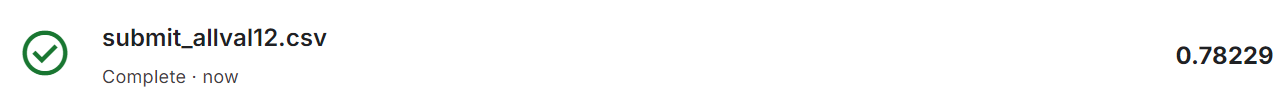